<a href="https://colab.research.google.com/github/agatan/Building-OCR-System-TechBookFest6/blob/master/techbook6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%sh
apt -qq -y update
apt -qq -y install fonts-ipafont
fc-list :lang=ja

78 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 3 newly installed, 0 to remove and 78 not upgraded.
Need to get 8,260 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 131323 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ipafont-mincho.
Preparing to unpack .../fonts-ipafont-mincho_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-mincho 

In [0]:
from typing import List, NamedTuple, Tuple
import subprocess
import random

import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [0]:
fontnames = subprocess.run("fc-list :lang=ja | sed  -r -e 's/^(.+): .*$/\\1/g'", stdout=subprocess.PIPE, shell=True).stdout.decode("utf-8").strip().split("\n")
fontnames

['/usr/share/fonts/opentype/ipafont-mincho/ipam.ttf',
 '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf',
 '/usr/share/fonts/opentype/ipafont-mincho/ipamp.ttf',
 '/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf',
 '/usr/share/fonts/truetype/fonts-japanese-mincho.ttf',
 '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf']

In [0]:
CHARACTERS = list("ぁあぃいぅうぇえぉおかがきぎくぐけげこごさざしじすずせぜそぞただちぢっつづてでとどなにぬねのはばぱひびぴふぶぷへべぺほぼぽまみむめもゃやゅゆょよらりるれろゎわゐゑをんァアィイゥウェエォオカガキギクグケゲコゴサザシジスズセゼソゾタダチヂッツヅテデトドナニヌネノハバパヒビピフブプヘベペホボポマミムメモャヤュユョヨラリルレロヮワヰヱヲンヴヵヶabcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!#$%&()*+-./:<=>?@[\]^_{}~ー々")

def random_text(length: int) -> str:
    return "".join(random.choices(CHARACTERS, k=length))

In [0]:
class TextBox(NamedTuple):
    text: str
    xmin: int
    ymin: int
    xmax: int
    ymax: int

[TextBox(text='やみにくプか-Kレf(sビ', xmin=29, ymin=183, xmax=194, ymax=202), TextBox(text='に{たムサへムぃ', xmin=126, ymin=69, xmax=149, ymax=73), TextBox(text='フろィザ', xmin=66, ymin=48, xmax=82, ymax=52), TextBox(text='ィ_おヌぞGどそ2iyへベゴチドの', xmin=17, ymin=211, xmax=150, ymax=220), TextBox(text='びパギ^ドへどz', xmin=115, ymin=122, xmax=171, ymax=130), TextBox(text='ヤよマつゃ1サCそぞ', xmin=107, ymin=77, xmax=161, ymax=83), TextBox(text='っさアyャヂ', xmin=78, ymin=142, xmax=128, ymax=151), TextBox(text='ハO1フ*みゐえァzどbムぽづ', xmin=68, ymin=21, xmax=208, ymax=31), TextBox(text='ひ-^cめヂィサるホj', xmin=95, ymin=90, xmax=142, ymax=96)]


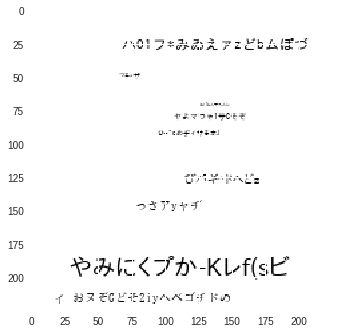

In [0]:
def generate(width: int, height: int) -> Tuple[Image.Image, List[TextBox]]:
    image = Image.new("RGB", (width, height), color=(255, 255, 255))
    draw = ImageDraw.Draw(image)
    used_map = np.zeros((height, width), dtype=np.bool)
    retry_count = 0
    boxes: List[TextBox] = []

    while retry_count < 10:
        retry_count += 1
        fontname = np.random.choice(fontnames)
        fontsize = np.random.randint(3, 20)
        font = ImageFont.truetype(fontname, fontsize)
        text_length = np.random.randint(3, 20)
        text = random_text(text_length)
        textsize_x, textsize_y = draw.textsize(text, font=font)
        if width <= textsize_x or height <= textsize_y:
            continue
        x = np.random.randint(0, width - textsize_x)
        y = np.random.randint(0, height - textsize_y)
        already_used_pixels_count = np.sum(used_map[y : y + textsize_y, x : x + textsize_x])
        if already_used_pixels_count > 0.02 * textsize_x * textsize_y:
            continue
        retry_count = 0
        used_map[y : y + textsize_y, x : x + textsize_x] = True
        draw.text((x, y), text, fill=(0, 0, 0), font=font)
        boxes.append(TextBox(text=text, xmin=x, ymin=y, xmax=x + textsize_x, ymax=y + textsize_y))
        if np.sum(used_map) > np.random.random() * width * height:
            break

    return image, boxes

image, boxes = generate(224, 224)
print(boxes)
plt.imshow(image)